In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.patches import Ellipse

### Is the target point within range?
- The 'range' is whatever is in the ellipse shown below, with the major axis representing the distance from your start and ending points
<center>
 <img src="./pics/Ellipse.png" alt="drawing" width="400"/>
</center>
- In this ellipse, the perimeter represents the points at which your path has the same length.
<center>
 <img src="./pics/p1_ellipse.png" alt="drawing" width="400"/>
 <img src="./pics/p2_ellipse.png" alt="drawing" width="400"/>
</center>

In [2]:
def start_end_line(start, end):
    slope = (start[1] - end[1]) / (start[0] - end[0])
    b = start[1] - (slope * start[0])
    
    x = np.linspace(start[0], end[0])
    y = slope * x + b
    return (x, y)

- where (xp, yp) are the point coordinates and (x0, y0) is the center of the ellipse
- where a is the minor axis and b is the major axis
<center>
 <img src="./pics/ellipse_eq.png" alt="drawing" width="800"/>
</center>


In [424]:
def rotate_point(point, center_of_rotation, angle_positive_counterclockwise_radians):
    x_0 = point[0]
    y_0 = point[1]
    
    x_c = center_of_rotation[0]
    y_c = center_of_rotation[1]
    
    theta = angle_positive_counterclockwise_radians
    
    cos = np.cos(theta)
    sin = np.sin(theta)
    
    x_1 = (cos * (x_0 - x_c)) - (sin * (y_0 - y_c)) + x_c
    y_1 = (sin * (x_0 - x_c)) + (cos * (y_0 - y_c)) + y_c
    
    return (x_1, y_1)

In [428]:
def angle_from_x_axis(start, stop):
    delta_x = start[0] - stop[0]
    delta_y = start[1] - stop[1]
    theta = np.arctan(delta_y / delta_x)
    return theta

In [440]:
angle_from_x_axis(start = la_coords, stop = tahoe_coords)# - (np.pi / 4)

-1.2300496827055136

In [441]:
rotate_point(point = (5, 5), center_of_rotation = (0, 0), angle_positive_counterclockwise_radians = -angle_from_x_axis(start = la_coords, stop = tahoe_coords))

(-3.041572526423193, 6.3834815396073346)

In [407]:
def get_midpoint(start, stop):
    delta_x = stop[0] + start[0]
    delta_y = stop[1] + start[1]
    
    if delta_x == 0:
        midpoint_x = start[0]
    else:
        midpoint_x = delta_x / 2
    if delta_y == 0:
        midpoint_y = start[1]
    else:
        midpoint_y = delta_y / 2
        
    return (midpoint_x, midpoint_y)

In [408]:
golden_gate_coords = (-122.4783, 37.8199)
tahoe_coords = (-120.0324, 39.0968)
la_coords = (-118.2437, 34.0522)

get_midpoint(start = la_coords, stop = golden_gate_coords)

(-120.361, 35.936049999999994)

In [409]:
get_midpoint(start = (0, 0), stop = (0, 10))

(0, 5.0)

In [236]:
360+180

540

In [ ]:
# figure out angle to rotate the plane
    if delta_x == 0:
        angle_radians = np.pi / 2
    else:
        angle_radians = np.arctan(delta_y / delta_x) # angle of line from x axis
    angle_degrees = angle_radians * 180 / np.pi
    
    angle_of_rotation = (2 * np.pi) - angle_radians # need to rotate back to original coordinate plane

In [494]:
def is_in_ellipse(start, stop, max_distance, df):
    
    midpoint = get_midpoint(start = start, stop = stop)
    target_list = list(zip(df['x'], df['y']))
    
    
    # transform all points so midpoint is centered
    start_translated = (start[0] - midpoint[0], start[1] - midpoint[1])
    stop_translated = (stop[0] - midpoint[0], stop[1] - midpoint[1])
    
    targets_translated = []
    for x in range(len(target_list)):
        target_translated = (target_list[x][0] - midpoint[0], target_list[x][1] - midpoint[1])
        targets_translated.append(target_translated)
    
    
    theta = angle_from_x_axis(start = start, stop = stop)
    theta_degrees = theta * 180 / np.pi
    start_rotated = rotate_point(point = start_translated, center_of_rotation = (0, 0), angle_positive_counterclockwise_radians = -theta)
    stop_rotated = rotate_point(point = stop_translated, center_of_rotation = (0, 0), angle_positive_counterclockwise_radians = -theta)
    
    target_list_rotated = []
    for x in range(len(targets_translated)):
        target_point = targets_translated[x]
        target_point_rotated = rotate_point(point = target_point, center_of_rotation = (0, 0), angle_positive_counterclockwise_radians = -theta)
        target_list_rotated.append(target_point_rotated)
    
    # define the major an minor axis
    delta_x_rotated = stop_rotated[0] - start_rotated[0]
    delta_y_rotated = stop_rotated[1] - start_rotated[1] # should always be zero
    
    major_axis = delta_x_rotated * max_distance # a + b
    minor_axis = major_axis * np.sqrt(max_distance**2 - 1) # formula below
    
    # see which points are in ellipse
    in_ellipse = []
    for x in range(len(target_list_rotated)):
        x_target = target_list_rotated[x][0]
        y_target = target_list_rotated[x][1]
        
        component1 = (x_target / (major_axis/2))**2
        component2 = (y_target / (minor_axis/2))**2
        
        if component1 + component2 <= 1:
            in_ellipse.append('1')
        else:
            in_ellipse.append('0')
        #in_ellipse.append(str(component1 + component2))
        #in_ellipse.append((x_target, y_target))
    
    mapped = [int(x) for x in in_ellipse]
    
    df['in_ellipse'] = mapped
    
    df_zeros = df.loc[df['in_ellipse'] == 0]
    df_ones = df.loc[df['in_ellipse'] == 1]
    
    plt.figure(figsize=(12, 12))
    ellipse = Ellipse(xy = get_midpoint(start, stop), width = major_axis, height = minor_axis, angle = theta_degrees, alpha = .4)
    plt.gca().add_patch(ellipse)
    plt.scatter(df_zeros['x'], df_zeros['y'], marker = 'o', c = df_zeros['rating'])
    plt.scatter(df_ones['x'], df_ones['y'], marker = "^", c = df_ones['rating'])
    plt.show()
    
    return theta_degrees


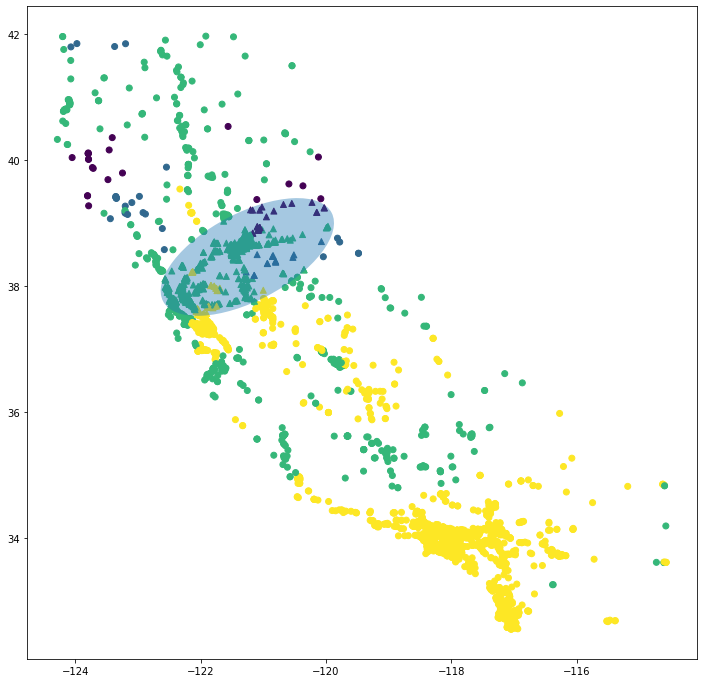

27.5671398237739

In [495]:
is_in_ellipse(start = golden_gate_coords, stop = tahoe_coords, max_distance = 1.1, df = gas_df)

In [ ]:
ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = line_angle, alpha = .8)
    plt.gca().add_patch(ellipse)

    plt.axis('scaled')
    
    #Now for visualizing which points are in the ellipse
    df = places_in_range_df(start = start, stop = stop, max_distance_increase = max_distance_increase, coordinate_df = coordinate_df)
    #map the in_range column to be numeric
    df['in_range_numeric'] = df['in_range'].map({'yes': 1, 'no': 0})
    
    df_zero = df.loc[df['in_range_numeric'] == 0]
    df_ones = df.loc[df['in_range_numeric'] == 1]
    
    plt.xlim(-124, -114)
    plt.ylim(33, 42)
    plt.scatter(df_zero['x'], df_zero['y'], marker = 'o', c = df_zero['ordinal_cat'])
    plt.scatter(df_ones['x'], df_ones['y'], marker = "^", c = df_ones['ordinal_cat'])
    
    plt.show()

array([0, 1])

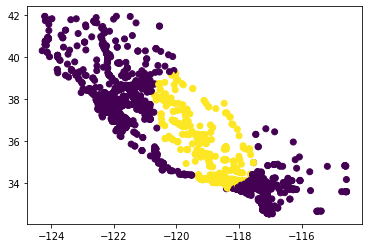

In [444]:
df_plot = is_in_ellipse(start = la_coords, stop = tahoe_coords, max_distance = 1.1, df = gas_df)
plt.scatter(x = df_plot['x'], y = df_plot['y'], c = df_plot['in_ellipse'])

df_plot['in_ellipse'].unique()

In [403]:
list(zip(gas_df['x'], gas_df['y']))

[(-117.1907772, 34.0573651),
 (-117.2256087, 34.0485747),
 (-117.1562993, 34.0413876),
 (-122.420268, 37.7684682),
 (-122.0701271, 37.381165),
 (-118.2372374, 34.10327279999999),
 (-122.078426, 37.40606470000001),
 (-121.7879328, 37.6774981),
 (-121.7868756, 37.6777037),
 (-122.25037140000002, 37.8373034),
 (-122.2372221, 37.8407536),
 (-122.26154409999998, 37.8404305),
 (-122.27001509999998, 37.8394465),
 (-122.2701261, 37.84002520000001),
 (-122.2334503, 37.7755014),
 (-122.2097519, 37.82558579999999),
 (-122.2441212, 37.8579312),
 (-122.2467567, 37.84382),
 (-122.35037, 37.581745),
 (-122.3341399, 37.5803881),
 (-122.3634177, 37.5872485),
 (-122.3623912, 37.5876457),
 (-122.3371847, 37.578398),
 (-122.3627774, 37.5887203),
 (-121.8623645, 37.2210474),
 (-117.954905, 33.7165414),
 (-120.230955, 37.83851660000001),
 (-122.087399, 37.3731217),
 (-117.2158525, 32.8670766),
 (-117.2041575, 32.854825899999994),
 (-117.204072, 32.8543944),
 (-117.2049467, 32.8542675),
 (-117.1843763, 32.82

In [413]:
golden_gate_coords = (-122.4783, 37.8199)
tahoe_coords = (-120.0324, 39.0968)
la_coords = (-118.2437, 34.0522)

get_midpoint(la_coords, golden_gate_coords)

(-120.361, 35.936049999999994)

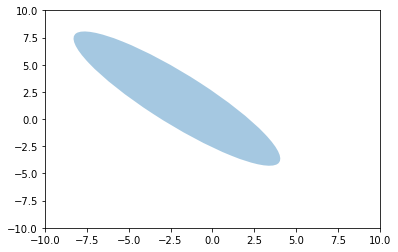

In [402]:
actual_angle = 315
plotting_angle = 180-actual_angle

ellipse = Ellipse(xy = get_midpoint(la_coords, golden_gate_coords), width = 4, height = 17, angle = plotting_angle, alpha = .4)
plt.gca().add_patch(ellipse)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
#now that we have our dataframe, let's plot it
x_test = df['x'].tolist()
y_test = df['y'].tolist()

mapped = [int(x) for x in in_ellipse]

ellipse = Ellipse(xy = midpoint, width = minor_axis, height = major_axis, angle = angle_of_rotation, alpha = .4)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
#plt.scatter(x_test, y_test, marker = 'o', c = in_ellipse)
plt.xlim(df['x'].min(), df['x'].max())
plt.ylim(df['y'].min(), df['y'].max())
plt.show()

In [286]:
gas_df = pd.read_csv('./data/from_shiff')
gas_df = gas_df.loc[gas_df['x'] != gas_df['x'].max()]
gas_df = gas_df[['name', 'x', 'y', '0']]
gas_df.rename(columns = {'0': 'rating'}, inplace = True)
gas_df.head()

,name,x,y,rating
0,Circle K & Minimart,-117.190777,34.057365,3
1,Unknown Name,-117.225609,34.048575,3
2,Unknown Name,-117.156299,34.041388,3
3,Arco,-122.420268,37.768468,2
4,Valley Oil,-122.070127,37.381165,3


In [292]:
len(gas_df['y'].tolist())

2926

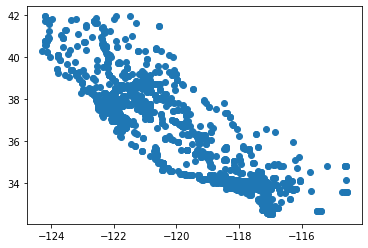

In [287]:
plt.scatter(x = gas_df['x'], y = gas_df['y'])

In [298]:
golden_gate_coords = (-122.4783, -37.8199)
tahoe_coords = (-120.0324, 39.0968)
la_coords = (-118.2437, -34.0522)

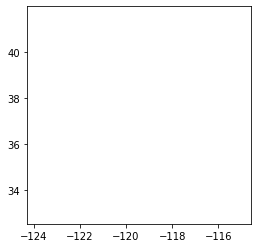

In [305]:
is_in_ellipse(start = la_coords, stop = tahoe_coords, max_distance = 1.15, df = gas_df)

In [267]:
gas_df['x'].min()

-124.28758

In [260]:
is_in_ellipse(start = (0, 0), stop = (10, 10), max_distance = 1.15, target_points = lis)

16.263455967290593

In [ ]:
#https://www.mathopenref.com/ellipseaxes.html

In [253]:
2 * np.sqrt(42+50)

19.183326093250876

In [254]:
1.15 * np.sqrt(200)

16.263455967290593

In [ ]:
target_points = list(zip(df['x'], df['y']))

In [220]:
lis

[(1, 1), (2, 2), (3, 3), (4, 4)]

In [163]:
x_range = (-5, 20)
y_range = (5, -20)

test_list_x = list(range(x_range[0], x_range[1]))
test_list_y = list(range(y_range[0], y_range[1]))

for x in range(len(test_list_x)):
    for j in range(len(test_list_y)):
        y_val = test_list_y[j]
        x_val = test_list_x[x]
        print(x_val)

IndexError: list index out of range

In [162]:
x_test = []
y_test = []
eq_val = []

for x in range(len(test_list_x)):
    x_val = test_list_x[x]
    for j in range(len(test_list_y)):
        y_val = test_list_y[j]
        x_test.append(x_val)
        y_test.append(j)
        
x_test

[]

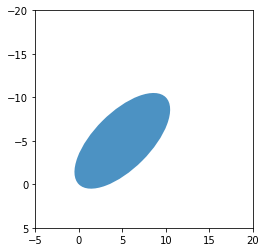

IndexError: list index out of range

In [147]:
start = (0, 0)
end = (10, -10)
#test = (1, 7)
x_range = (-5, 20)
y_range = (5, -20)

test_list_x = list(range(x_range[0], x_range[1]))
test_list_y = list(range(y_range[0], y_range[1]))

midpoint = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)
max_distance_increase = 1.1

#change in x and y for the stop and start coords
delta_x = end[0] - start[0]
delta_y = end[1] - start[1]

#distance between start and stop
d = np.sqrt((delta_x)**2 + (delta_y)**2)

major_axis = d
minor_axis = d * np.sqrt(max_distance_increase**2 - 1)
angle_radians = np.arctan(delta_y / delta_x)
angle_degrees = angle_radians * 180 / np.pi

cosa = np.cos(angle_radians)
sina = np.sin(angle_radians)

x_test = []
y_test = []
eq_val = []

for x in range(len(test_list_x)):
    x_val = test_list_x[x]
    for j in range(len(test_list_y)):
        y_val = test_list_y[j]
        x_test.append(x)
        y_test.append(j)
        x_diff = x_val - midpoint[0]
        y_diff = y_val - midpoint[1]
        
        component_1 = (((cosa * x_diff) + (sina * y_diff))/(major_axis/2))**2
        
        component_2 = (((sina * x_diff) - (cosa * y_diff))/(minor_axis/2))**2
        
        #component_1 = ((((x_val - 6) * np.cos(angle_radians)) + ((y_val - 6) * np.sin(angle_radians)))/ (major_axis/2))**2
        #component_2 = ((((x_val - 6) * np.sin(angle_radians)) - ((y_val - 6) * np.cos(angle_radians))) / (minor_axis/2))**2
        
        eq_value = component_1 + component_2
        
        if eq_value <=1:
            eq_val.append('1')
        else:
            eq_val.append('0')
        
            
mapped = [int(x) for x in eq_val]

ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = angle_degrees, alpha = .8)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.scatter(x_test, y_test, marker = 'o', c = mapped)
plt.xlim(x_range[0], x_range[1])
plt.ylim(y_range[0], y_range[1])
plt.show()

x_test[0]

In [81]:
len(y_test)

0

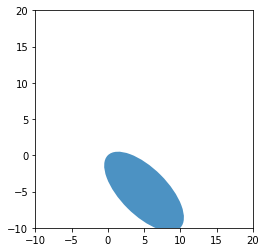

IndexError: list index out of range

In [135]:
# normalize to midpoint
start = (0, 0)
end = (10, -10)
#test = (1, 7)

test_list_x = list(range(-15, 40))
test_list_y = list(range(-15, 40))

midpoint = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)
max_distance_increase = 1.1

#change in x and y for the stop and start coords
delta_x = end[0] - start[0]
delta_y = end[1] - start[1]

#distance between start and stop
d = np.sqrt((delta_x)**2 + (delta_y)**2)

major_axis = d
minor_axis = d * np.sqrt(max_distance_increase**2 - 1)
angle_radians = np.arctan(delta_y / delta_x)
angle_degrees = angle_radians * 180 / np.pi

x_test = []
y_test = []
eq_val = []

x_new = [x - midpoint[0] for x in test_list_x]
y_new = [y - midpoint[1] for y in test_list_y]

for x in range(len(x_new)):
    x_val = x_new[x]
    for j in range(len(y_test)):
        y_val = y_test[j]
        
        x_test.append(x)
        y_test.append(j)
        
        component_1 = ((((x_val - 6) * np.cos(angle_radians)) + ((y_val - 6) * np.sin(angle_radians)))/ (major_axis/2))**2
        component_2 = ((((x_val - 6) * np.sin(angle_radians)) - ((y_val - 6) * np.cos(angle_radians))) / (minor_axis/2))**2
        #n = (5, 5)
        #component_1 = ((((x_val + n[0]) * np.cos(angle_radians)) + ((y_val + n[1]) * np.sin(angle_radians)))/ (major_axis/2))**2
        #omponent_2 = ((((x_val + n[0]) * np.sin(angle_radians)) - ((y_val + n[1]) * np.cos(angle_radians))) / (minor_axis/2))**2
        
        #n = midpoint
        #component_1 = ((((-n[0] - x_val) * np.cos(angle_radians)) + ((-n[1] - y_val) * np.sin(angle_radians)))/ (major_axis/2))**2
        #component_2 = ((((-n[0] - x_val) * np.sin(angle_radians)) - ((-n[1] - y_val) * np.cos(angle_radians))) / (minor_axis/2))**2
        
        eq_value = component_1 + component_2
        
        if eq_value <=1:
            eq_val.append('1')
        else:
            eq_val.append('0')
        
            
mapped = [int(x) for x in eq_val]

ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = angle_degrees, alpha = .8)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.scatter(x_test, y_test, marker = 'o', c = mapped)
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.show()

x_test[0]

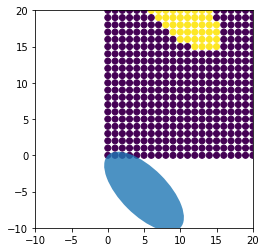

0

In [136]:
start = (0, 0)
end = (10, -10)
#test = (1, 7)

test_list_x = list(range(-15, 40))
test_list_y = list(range(-15, 40))

midpoint = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)
max_distance_increase = 1.1

#change in x and y for the stop and start coords
delta_x = end[0] - start[0]
delta_y = end[1] - start[1]

#distance between start and stop
d = np.sqrt((delta_x)**2 + (delta_y)**2)

major_axis = d
minor_axis = d * np.sqrt(max_distance_increase**2 - 1)
angle_radians = np.arctan(delta_y / delta_x)
angle_degrees = angle_radians * 180 / np.pi

x_test = []
y_test = []
eq_val = []

for x in range(len(test_list_x)):
    x_val = test_list_x[x]
    for j in range(len(test_list_y)):
        y_val = test_list_y[j]
        
        x_test.append(x)
        y_test.append(j)
        
        #component_1 = ((((x_val - 6) * np.cos(angle_radians)) + ((y_val - 6) * np.sin(angle_radians)))/ (major_axis/2))**2
        #component_2 = ((((x_val - 6) * np.sin(angle_radians)) - ((y_val - 6) * np.cos(angle_radians))) / (minor_axis/2))**2
        #n = (5, 5)
        #component_1 = ((((x_val + n[0]) * np.cos(angle_radians)) + ((y_val + n[1]) * np.sin(angle_radians)))/ (major_axis/2))**2
        #omponent_2 = ((((x_val + n[0]) * np.sin(angle_radians)) - ((y_val + n[1]) * np.cos(angle_radians))) / (minor_axis/2))**2
        
        n = midpoint
        #component_1 = ((((-n[0] - x_val) * np.cos(angle_radians)) + ((-n[1] - y_val) * np.sin(angle_radians)))/ (major_axis/2))**2
        #component_2 = ((((-n[0] - x_val) * np.sin(angle_radians)) - ((-n[1] - y_val) * np.cos(angle_radians))) / (minor_axis/2))**2
        
        component_1 = ((((-n[0] - x_val) * np.cos(angle_radians)) + ((-n[1] - y_val) * np.sin(angle_radians)))/ (major_axis/2))**2
        component_2 = ((((-n[0] - x_val) * np.sin(angle_radians)) - ((-n[1] - y_val) * np.cos(angle_radians))) / (minor_axis/2))**2
        
        eq_value = component_1 + component_2
        
        if eq_value <=1:
            eq_val.append('1')
        else:
            eq_val.append('0')
        
            
mapped = [int(x) for x in eq_val]

ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = angle_degrees, alpha = .8)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.scatter(x_test, y_test, marker = 'o', c = mapped)
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.show()

x_test[0]

In [ ]:
#component 1:
component_1 = (((np.cos(angle_radians) * (test[0] - midpoint[0])) + (np.sin(angle_radians) * (test[1] - midpoint[1])))/ minor_axis)**2

#component 3:
component_3 = (((np.sin(angle_radians) * (test[0] - midpoint[0])) - (np.cos(angle_radians) * (test[1] - midpoint[1]))) / major_axis)**2

ellipse_eq = component_1 + component_2
midpoint
ellipse_eq

ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = angle_degrees, alpha = .1)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.scatter([start[0], end[0], midpoint[0], test[0]], [start[1], end[1], midpoint[1], test[1]], marker = 'o')
#plt.scatter(df_ones['x'], df_ones['y'], marker = "^", c = df_ones['ordinal_cat'])
plt.show()
ellipse_eq
print(minor_axis, np.sqrt(50))
ellipse_eq

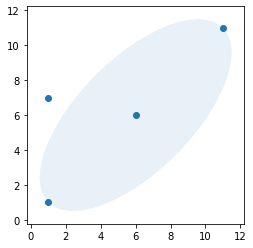

0.2804761904761903

In [68]:
# shift all points to where the origin is the midpoint to determine if the test points are range
start = (1, 1)
end = (11, 11)
test = (1, 7)
midpoint = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)

#here's the shift
x_original = [start[0], end[0], midpoint[0], test[0]]
y_original = [start[1], end[1], midpoint[1], test[1]]

x_new = [x - midpoint[0] for x in x_original]
y_new = [y - midpoint[1] for y in y_original]

d = np.sqrt((10)**2 + (10)**2)
max_distance_increase = 1.1

major_axis = d
minor_axis = d * np.sqrt(max_distance_increase**2 - 1)
angle_radians = np.arctan(10 / 10)
angle_degrees = angle_radians * 180 / np.pi

#component 1:
component_1 = (((np.cos(angle_radians) * (x_new[3] - x_new[2])) + (np.sin(angle_radians) * (y_new[3] - y_new[2])))/ minor_axis)**2

#component 3:
component_3 = (((np.sin(angle_radians) * (x_new[3] - x_new[2])) - (np.cos(angle_radians) * (y_new[3] - y_new[2]))) / major_axis)**2

ellipse_eq = component_1 + component_2
midpoint
ellipse_eq

ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = angle_degrees, alpha = .1)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.scatter([start[0], end[0], midpoint[0], test[0]], [start[1], end[1], midpoint[1], test[1]], marker = 'o')
#plt.scatter(df_ones['x'], df_ones['y'], marker = "^", c = df_ones['ordinal_cat'])
plt.show()
ellipse_eq
#print(minor_axis, np.sqrt(50))

x_new
ellipse_eq

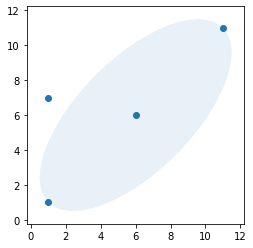

6.480740698407864 7.0710678118654755


0.2804761904761903

In [69]:
start = (1, 1)
end = (11, 11)
test = (1, 7)
midpoint = ((start[0] + end[0]) / 2, (start[1] + end[1]) / 2)
d = np.sqrt((10)**2 + (10)**2)
max_distance_increase = 1.1

major_axis = d
minor_axis = d * np.sqrt(max_distance_increase**2 - 1)
angle_radians = np.arctan(10 / 10)
angle_degrees = angle_radians * 180 / np.pi

#component 1:
component_1 = (((np.cos(angle_radians) * (test[0] - midpoint[0])) + (np.sin(angle_radians) * (test[1] - midpoint[1])))/ minor_axis)**2

#component 3:
component_3 = (((np.sin(angle_radians) * (test[0] - midpoint[0])) - (np.cos(angle_radians) * (test[1] - midpoint[1]))) / major_axis)**2

ellipse_eq = component_1 + component_2
midpoint
ellipse_eq

ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = angle_degrees, alpha = .1)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.scatter([start[0], end[0], midpoint[0], test[0]], [start[1], end[1], midpoint[1], test[1]], marker = 'o')
#plt.scatter(df_ones['x'], df_ones['y'], marker = "^", c = df_ones['ordinal_cat'])
plt.show()
ellipse_eq
print(minor_axis, np.sqrt(50))
ellipse_eq

In [24]:
def in_ellipse(start, end, target, max_distance_increase):
    
    x_target = target[0]
    y_target = target[1]
    
    # midpoint on the line connecting the start and stop
    x_midpoint = (start[0] + end[0]) / 2
    y_midpoint = (start[1] + end[1]) / 2
    midpoint = (x_midpoint, y_midpoint)
    
    #change in x and y for the stop and start coords
    delta_x = end[0] - start[0]
    delta_y = end[1] - start[1]

    #distance between start and stop
    d = np.sqrt((delta_x)**2 + (delta_y)**2)
    
    #major and minor axis based on distance between two points and the max distance increase
    major_axis = d
    minor_axis = d * np.sqrt(max_distance_increase**2 - 1)

    #for the ellipse, we need the angle of the line (the line connecting start and stop points) and the x axis
    angle_radians = np.arctan(delta_y / delta_x)
    angle_degrees = angle_radians * 180 / np.pi
    
    #now for the ellipse equation:
    #component 1:
    component_1 = ((np.cos(angle_radians) * (x_target - x_midpoint)) + (np.sin(angle_radians) * (y_target - y_midpoint)))**2 / (minor_axis ** 2)
    #component 2:
    component_2 = ((np.sin(angle_radians) * (x_target - x_midpoint)) - (np.cos(angle_radians) * (y_target - y_midpoint)))**2 / (major_axis ** 2)
    
    ellipse_eq = component_1 + component_2
    
    if ellipse_eq <= 1:
        return True
    else:
        return False

In [34]:
np.arctan(10 / 10)

0.7853981633974483

In [35]:
np.round(np.cos(np.arctan(10 / 10)))

1.0

In [33]:
np.round(np.cos(45 * np.pi / 180))

1.0

In [25]:
# example to test ellipse
start_point = (1, 1)
end_point = (5, 5)
target_point = (1, 5)
m = 1.1

in_ellipse(start = start_point, end = end_point, target = target_point, max_distance_increase = m)

True

In [4]:
# If it's in the ellipse, how long is your journey?
def trip_length(start, end, target):
    # create x and y designations
    x1 = start[0]
    y1 = start[1]
    x2 = end[0]
    y2 = end[1]
    x_target = target[0]
    y_target = target[1]
    
    # distance from start to target
    start_target = np.sqrt((x1 - x_target)**2 + (y1 - y_target)**2)
    
    #distance from target to end
    target_end = np.sqrt((x2 - x_target)**2 + (y2 - y_target)**2)
    
    return start_target + target_end

In [5]:
# What's the ratio of your new journey vs if you hadn't stopped at all?
def trip_ratio(start, end, target):
    # distance without stop
    d = np.sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2)
    
    #distance with stop
    new_journey = trip_length(start, end, target)
    
    return new_journey / d

In [6]:
def places_in_range_df(start, stop, max_distance_increase, coordinate_df):
    """
    Given start coordinates, end coordinates, how far you're willing to go out of your way, and the dataframe of all gas stations
    
    
    determine which gas stations are in the desired range, and visualize this based on:
    - shape (binary: in range or not)
    - color (categorical: how 'hot' for covid)
    """
    
    # only keep x and y coordinate columns, and category of covid heat
    df = coordinate_df[['x', 'y', 'ordinal_cat']]
    
    # make these columns into lists
    x_list = df['x'].tolist()
    y_list = df['y'].tolist()
    
    # create list of coordinates as tuples
    coordinate_list = []
    for x in range(len(x_list)):
        a, b = x_list[x], y_list[x]
        coordinate_list.append((a, b))
    
    #create empty list that will be filled 'yes' if in range, and 'no' if not in range
    in_range = []
    #create empty list that will be filled with the trip ratio for the coordinates that are in range and NaN for not in range
    trip_ratios = []
    #create empty list that will be filled with the trip length for the coordinates that are in range and NaN for not in range
    trip_lengths = []
    
    #loop through coordinate list
    for x in coordinate_list:
        # for each row / coordiante, determine if it's in range
        if in_ellipse(start = start, end = stop, target = x, max_distance_increase = max_distance_increase) == True:
            in_range.append('yes')
            trip_ratios.append(trip_ratio(start = start, end = stop, target = x))
            trip_lengths.append(trip_length(start = start, end = stop, target = x))
        else:
            in_range.append('no')
            trip_ratios.append(None)
            trip_lengths.append(None)
        
    df['in_range'] = in_range
    df['trip_ratios'] = trip_ratios
    df['trip_lengths'] = trip_lengths
    return df

In [10]:
def full_viz(start, stop, max_distance_increase, coordinate_df):
    # for visualizing the line connecting start and stop points
    (x, y) = start_end_line(start, stop)
    plt.plot(x, y, '-r')
    
    # midpoint on the line connecting the start and stop
    x_midpoint = (start[0] + stop[0]) / 2
    y_midpoint = (start[1] + stop[1]) / 2
    midpoint = (x_midpoint, y_midpoint)
    
    #change in x and y for the stop and start coords
    delta_x = stop[0] - start[0]
    delta_y = stop[1] - start[1]

    #distance between start and stop
    d = np.sqrt((delta_x)**2 + (delta_y)**2)
    
    #major and minor axis based on distance between two points and the max distance increase
    major_axis = d
    minor_axis = d * np.sqrt(max_distance_increase**2 - 1)

    #for plotting the ellipse, we need the angle of the line (the line connecting start and stop points) and the x axis
    line_angle = np.degrees(np.arctan(delta_y / delta_x))

    # Now for the ellipse plot
    # https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
    ellipse = Ellipse(xy = midpoint, width = major_axis, height = minor_axis, angle = line_angle, alpha = .8)
    plt.gca().add_patch(ellipse)

    plt.axis('scaled')
    
    #Now for visualizing which points are in the ellipse
    df = places_in_range_df(start = start, stop = stop, max_distance_increase = max_distance_increase, coordinate_df = coordinate_df)
    #map the in_range column to be numeric
    df['in_range_numeric'] = df['in_range'].map({'yes': 1, 'no': 0})
    
    df_zero = df.loc[df['in_range_numeric'] == 0]
    df_ones = df.loc[df['in_range_numeric'] == 1]
    
    plt.xlim(-124, -114)
    plt.ylim(33, 42)
    plt.scatter(df_zero['x'], df_zero['y'], marker = 'o', c = df_zero['ordinal_cat'])
    plt.scatter(df_ones['x'], df_ones['y'], marker = "^", c = df_ones['ordinal_cat'])
    
    plt.show()

In [11]:
gas_df_a = pd.read_csv('./data/gas_stations_with_cat.csv')
gas_df_b = gas_df_a.loc[gas_df_a['x'] != gas_df_a['x'].max()]

<ipython-input-6-aa51ed7de47b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_range'] = in_range


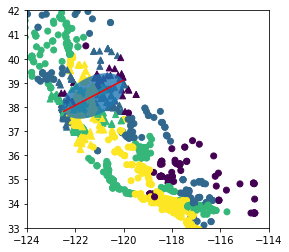

In [12]:
start_point = (-122.4783, 37.8199)
end_point = (-120.0324, 39.0968)

full_viz(start = start_point, stop = end_point, max_distance_increase = 1.15, coordinate_df = gas_df_b)